In [192]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

df0 = pd.read_csv('TW_CC_formatted.csv') #pivoted format

df0

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,CATEGORY
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,default,21-30
1,2,120000,female,university,single,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,21-30
2,3,90000,female,university,single,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,no default,31-40
3,4,50000,female,university,married,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,no default,31-40
4,5,50000,male,university,married,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,no default,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,no default,31-40
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,no default,41-50
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,default,31-40
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,default,41-50


In [193]:
#bucket PAY_AMT, BILL_AMT

def bucket_PAYAMT_BILLAMT(df):
    bins_pa = [1,100,1000,10000,100000,1000001] #exclude 0 and negative
    category_pa = ['< 100','100-999','1000-9999','10000-99999','100000-1000000']
    num = 6
    for x in range(1, num+1):
        df['PAY_AMT_CAT'+str(x)] = pd.cut(df['PAY_AMT'+str(x)], bins_pa, labels = category_pa)
        df['PAY_AMT_CAT'+str(x)] = np.where(df['PAY_AMT'+str(x)] == 0, '0', df['PAY_AMT_CAT'+str(x)])
        df['PAY_AMT_CAT'+str(x)] = np.where(df['PAY_AMT'+str(x)] <0, '< 0', df['PAY_AMT_CAT'+str(x)])
        df['BILL_AMT_CAT'+str(x)] = pd.cut(df['BILL_AMT'+str(x)], bins_pa, labels = category_pa)
        df['BILL_AMT_CAT'+str(x)] = np.where(df['BILL_AMT'+str(x)] == 0, '0', df['BILL_AMT_CAT'+str(x)])
        df['BILL_AMT_CAT'+str(x)] = np.where(df['BILL_AMT'+str(x)] <0, '< 0', df['BILL_AMT_CAT'+str(x)])

In [194]:
bucket_PAYAMT_BILLAMT(df0)

In [195]:
#adding new metrics DEBT_OWED, PCT_CREDIT_UTILIZED, and bucket them

def create_bucket_debtOwed(df, var1, var2):
    num = 6
    bins_bu = [-1000001,-100000,-10000,-1000,-100,-0.000000001] #exclude 0 and positive
    category_bu = ['-(1000000-100000)','-(99999-10000)','-(9999-1000)','-(999-100)','>-100']
    for x in range(1, num+1):
        df['DEBT_OWED'+str(x)] = df[var1+str(x)]-df[var2+str(x)]
        df['DEBT_OWED_CAT'+str(x)] = pd.cut(df['DEBT_OWED'+str(x)], bins_bu, labels = category_bu)
        df['DEBT_OWED_CAT'+str(x)] = np.where(df['DEBT_OWED'+str(x)] == 0, '0', df['DEBT_OWED_CAT'+str(x)])
        df['DEBT_OWED_CAT'+str(x)] = np.where(df['DEBT_OWED'+str(x)] >0, '> 0', df['DEBT_OWED_CAT'+str(x)])

def create_bucket_creditUtilized(df, var1, var2):
    bins_pct = [0.0000000001,0.1,0.2,0.3,0.4,0.5,1] #exclude 0, larger than 1 and negative
    category_pct = ['< 10%','10-20%','20-30%','30-40%','40-50%','> 50%']
    num = 6
    for x in range(1, num+1):
        df['PCT_CREDIT_UTILIZED'+str(x)] = df[var1+str(x)]/df[var2]
        df['PCT_CREDIT_UTILIZED_CAT'+str(x)] = pd.cut(df['PCT_CREDIT_UTILIZED'+str(x)],bins_pct,labels = category_pct)
        df['PCT_CREDIT_UTILIZED_CAT'+str(x)] = np.where(df['PCT_CREDIT_UTILIZED'+str(x)] == 0, '0', df['PCT_CREDIT_UTILIZED_CAT'+str(x)] )
        df['PCT_CREDIT_UTILIZED_CAT'+str(x)] = np.where(df['PCT_CREDIT_UTILIZED'+str(x)] >1, '> 100%', df['PCT_CREDIT_UTILIZED_CAT'+str(x)] )
        df['PCT_CREDIT_UTILIZED_CAT'+str(x)] = np.where(df['PCT_CREDIT_UTILIZED'+str(x)] <0, '< 0', df['PCT_CREDIT_UTILIZED_CAT'+str(x)] )

In [196]:
create_bucket_debtOwed(df0, 'PAY_AMT', 'BILL_AMT')

create_bucket_creditUtilized(df0, 'BILL_AMT', 'LIMIT_BAL')

In [197]:
#formatting Y variable for logistic regression

df0['default payment next month']=np.where(df0['default payment next month'] == 'no default', 0, df0['default payment next month'])
df0['default payment next month']=np.where(df0['default payment next month'] == 'default', 1, df0['default payment next month'])

In [198]:
df0.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month', 'CATEGORY',
       'PAY_AMT_CAT1', 'BILL_AMT_CAT1', 'PAY_AMT_CAT2', 'BILL_AMT_CAT2',
       'PAY_AMT_CAT3', 'BILL_AMT_CAT3', 'PAY_AMT_CAT4', 'BILL_AMT_CAT4',
       'PAY_AMT_CAT5', 'BILL_AMT_CAT5', 'PAY_AMT_CAT6', 'BILL_AMT_CAT6',
       'DEBT_OWED1', 'DEBT_OWED_CAT1', 'DEBT_OWED2', 'DEBT_OWED_CAT2',
       'DEBT_OWED3', 'DEBT_OWED_CAT3', 'DEBT_OWED4', 'DEBT_OWED_CAT4',
       'DEBT_OWED5', 'DEBT_OWED_CAT5', 'DEBT_OWED6', 'DEBT_OWED_CAT6',
       'PCT_CREDIT_UTILIZED1', 'PCT_CREDIT_UTILIZED_CAT1',
       'PCT_CREDIT_UTILIZED2', 'PCT_CREDIT_UTILIZED_CAT2',
       'PCT_CREDIT_UTILIZED3', 'PCT_CREDIT_UTILIZED_CAT3',
       'PCT_CREDIT_UTILIZED4', 'PCT_CREDIT_UTILIZED_

In [199]:
#Create dummy variables for demographic fields

cat_vars = ['SEX', 'CATEGORY', 'PAY_AMT_CAT1', 'BILL_AMT_CAT1', 'PAY_AMT_CAT2', 'BILL_AMT_CAT2',
       'PAY_AMT_CAT3', 'BILL_AMT_CAT3', 'PAY_AMT_CAT4', 'BILL_AMT_CAT4',
       'PAY_AMT_CAT5', 'BILL_AMT_CAT5', 'PAY_AMT_CAT6', 'BILL_AMT_CAT6',
       'DEBT_OWED_CAT1', 'DEBT_OWED_CAT2','DEBT_OWED_CAT3', 'DEBT_OWED_CAT4',
       'DEBT_OWED_CAT5', 'DEBT_OWED_CAT6','PCT_CREDIT_UTILIZED_CAT1',
       'PCT_CREDIT_UTILIZED_CAT2','PCT_CREDIT_UTILIZED_CAT3','PCT_CREDIT_UTILIZED_CAT4',
       'PCT_CREDIT_UTILIZED_CAT5','PCT_CREDIT_UTILIZED_CAT6']
for var in cat_vars:
    cat_list ='var'+'_'+var
    cat_list = pd.get_dummies(df0[var], prefix=var)
    df0_temp = df0.join(cat_list)
    df0 = df0_temp

In [200]:
df0.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4',
       ...
       'PCT_CREDIT_UTILIZED_CAT5_> 50%', 'PCT_CREDIT_UTILIZED_CAT6_0',
       'PCT_CREDIT_UTILIZED_CAT6_10-20%', 'PCT_CREDIT_UTILIZED_CAT6_20-30%',
       'PCT_CREDIT_UTILIZED_CAT6_30-40%', 'PCT_CREDIT_UTILIZED_CAT6_40-50%',
       'PCT_CREDIT_UTILIZED_CAT6_< 0', 'PCT_CREDIT_UTILIZED_CAT6_< 10%',
       'PCT_CREDIT_UTILIZED_CAT6_> 100%', 'PCT_CREDIT_UTILIZED_CAT6_> 50%'],
      dtype='object', length=244)

In [201]:
cat_vars_removal = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', \
                    'CATEGORY', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', \
                    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1', \
                    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',\
                    'PAY_AMT6', 'PAY_AMT_CAT1','BILL_AMT_CAT1', \
                    'PAY_AMT_CAT2', 'BILL_AMT_CAT2','PAY_AMT_CAT3', \
                    'BILL_AMT_CAT3', 'PAY_AMT_CAT4', 'BILL_AMT_CAT4',\
                    'PAY_AMT_CAT5', 'BILL_AMT_CAT5', 'PAY_AMT_CAT6', \
                    'BILL_AMT_CAT6','DEBT_OWED1', 'DEBT_OWED_CAT1', \
                    'DEBT_OWED2', 'DEBT_OWED_CAT2','DEBT_OWED3', \
                    'DEBT_OWED_CAT3', 'DEBT_OWED4', 'DEBT_OWED_CAT4',\
                    'DEBT_OWED5', 'DEBT_OWED_CAT5', 'DEBT_OWED6', \
                    'DEBT_OWED_CAT6','PCT_CREDIT_UTILIZED1', \
                    'PCT_CREDIT_UTILIZED_CAT1','PCT_CREDIT_UTILIZED2', \
                    'PCT_CREDIT_UTILIZED_CAT2','PCT_CREDIT_UTILIZED3', \
                    'PCT_CREDIT_UTILIZED_CAT3','PCT_CREDIT_UTILIZED4', \
                    'PCT_CREDIT_UTILIZED_CAT4','PCT_CREDIT_UTILIZED5', \
                    'PCT_CREDIT_UTILIZED_CAT5','PCT_CREDIT_UTILIZED6', \
                    'PCT_CREDIT_UTILIZED_CAT6']
df_vars = df0.columns.values.tolist()
to_keep=[x for x in df_vars if x not in cat_vars_removal]

In [202]:
df = df0[to_keep]

df.loc[:,'default payment next month'] = pd.to_numeric(df['default payment next month'])

df.columns.values

array(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'default payment next month', 'SEX_female', 'SEX_male',
       'CATEGORY_21-30', 'CATEGORY_31-40', 'CATEGORY_41-50',
       'CATEGORY_51-60', 'CATEGORY_61-70', 'CATEGORY_71-80',
       'PAY_AMT_CAT1_0', 'PAY_AMT_CAT1_100-999', 'PAY_AMT_CAT1_1000-9999',
       'PAY_AMT_CAT1_10000-99999', 'PAY_AMT_CAT1_100000-1000000',
       'PAY_AMT_CAT1_< 100', 'BILL_AMT_CAT1_0', 'BILL_AMT_CAT1_100-999',
       'BILL_AMT_CAT1_1000-9999', 'BILL_AMT_CAT1_10000-99999',
       'BILL_AMT_CAT1_100000-1000000', 'BILL_AMT_CAT1_< 0',
       'BILL_AMT_CAT1_< 100', 'PAY_AMT_CAT2_0', 'PAY_AMT_CAT2_100-999',
       'PAY_AMT_CAT2_1000-9999', 'PAY_AMT_CAT2_10000-99999',
       'PAY_AMT_CAT2_100000-1000000', 'PAY_AMT_CAT2_< 100',
       'BILL_AMT_CAT2_0', 'BILL_AMT_CAT2_100-999',
       'BILL_AMT_CAT2_1000-9999', 'BILL_AMT_CAT2_10000-99999',
       'BILL_AMT_CAT2_100000-1000000', 'BILL_AMT_CAT2_< 0',
       'BILL_AMT_CAT2_< 100', 'PAY_AMT_CAT3_0', 'P

In [203]:
#Over-sampling using SMOTE

X = df.loc[:, df.columns != 'default payment next month']
y = df.loc[:, df.columns == 'default payment next month']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['default payment next month'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-default in oversampled data",len(os_data_y[os_data_y['default payment next month']==0]))
print("Number of default",len(os_data_y[os_data_y['default payment next month']==1]))
print("Proportion of non-default data in oversampled data is ",len(os_data_y[os_data_y['default payment next month']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['default payment next month']==1])/len(os_data_X))

length of oversampled data is  32608
Number of non-default in oversampled data 16304
Number of default 16304
Proportion of non-default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


In [204]:
#Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000)

rfe = RFE(estimator=logreg, n_features_to_select=30)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True  True  True
  True  True False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True  True  True False  True  True False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [205]:
temp = pd.DataFrame(os_data_X.columns.values)
temp['S'] = rfe.support_
temp['R'] = rfe.ranking_

temp[temp['R'] == 1]

,0,S,R
6,SEX_female,True,1
7,SEX_male,True,1
8,CATEGORY_21-30,True,1
9,CATEGORY_31-40,True,1
10,CATEGORY_41-50,True,1
11,CATEGORY_51-60,True,1
12,CATEGORY_61-70,True,1
13,CATEGORY_71-80,True,1
79,PAY_AMT_CAT6_0,True,1
80,PAY_AMT_CAT6_100-999,True,1


In [206]:
cols=['SEX_female','SEX_male','CATEGORY_21-30','CATEGORY_31-40','CATEGORY_41-50','CATEGORY_51-60','CATEGORY_61-70',\
      'CATEGORY_71-80','PAY_AMT_CAT6_0','PAY_AMT_CAT6_100-999','PAY_AMT_CAT6_1000-9999','PAY_AMT_CAT6_10000-99999',\
      'PAY_AMT_CAT6_100000-1000000','PAY_AMT_CAT6_< 100','BILL_AMT_CAT6_0','BILL_AMT_CAT6_< 0',\
      'PCT_CREDIT_UTILIZED_CAT1_10-20%','PCT_CREDIT_UTILIZED_CAT1_20-30%','PCT_CREDIT_UTILIZED_CAT1_30-40%',\
      'PCT_CREDIT_UTILIZED_CAT1_40-50%','PCT_CREDIT_UTILIZED_CAT1_< 0','PCT_CREDIT_UTILIZED_CAT1_> 100%',\
      'PCT_CREDIT_UTILIZED_CAT1_> 50%','PCT_CREDIT_UTILIZED_CAT6_10-20%','PCT_CREDIT_UTILIZED_CAT6_20-30%',\
      'PCT_CREDIT_UTILIZED_CAT6_30-40%','PCT_CREDIT_UTILIZED_CAT6_40-50%','PCT_CREDIT_UTILIZED_CAT6_< 10%',\
      'PCT_CREDIT_UTILIZED_CAT6_> 100%','PCT_CREDIT_UTILIZED_CAT6_> 50%']

X=os_data_X[cols]
y=os_data_y

In [207]:
#Implement the model
#Output: Model_Output

import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.631474
         Iterations 6
                                 Results: Logit
Model:                 Logit                       Pseudo R-squared:  0.089     
Dependent Variable:    default payment next month  AIC:               41242.1885
Date:                  2020-06-09 13:33            BIC:               41493.9578
No. Observations:      32608                       Log-Likelihood:    -20591.   
Df Model:              29                          LL-Null:           -22602.   
Df Residuals:          32578                       LLR p-value:       0.0000    
Converged:             1.0000                      Scale:             1.0000    
No. Iterations:        6.0000                                                   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------

In [208]:
#Remove variables with p > 0.05 or close to 0.05

del X['PCT_CREDIT_UTILIZED_CAT1_20-30%']
del X['PCT_CREDIT_UTILIZED_CAT1_30-40%'] 
del X['PCT_CREDIT_UTILIZED_CAT1_40-50%']

In [209]:
#Logistic Regression Model Fitting

from sklearn import metrics

y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [210]:
#Predicting the test set results and calculating the accuracy
#Accuracy of logistic regression classifier on test set: 0.76

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [211]:
#Check the quality of prediction through cross-validation

from sklearn.model_selection import cross_val_score

print(cross_val_score(logreg, X, y, scoring='accuracy', cv=10))
print(cross_val_score(logreg, X, y, cv=10, scoring='r2').mean())
print(cross_val_score(logreg, X, y, cv=10, scoring='r2').std())

[0.52775222 0.52621895 0.5642441  0.85556578 0.84973934 0.85219258
 0.85127262 0.86476541 0.86134969 0.85153374]
0.04185369358254372
0.5804177613793888


In [212]:
#check the resulting hyperplane parameters

print(logreg.intercept_)
print(logreg.coef_)

[16.38960966]
[[-4.88761433 -4.7358186  -4.73291719 -4.76996455 -4.77016871 -4.72300578
  -4.75476413 -2.48993711 -3.39365878 -3.75651036 -4.05012036 -4.83120091
  -4.59048306 -3.90834149 -3.63414811 -4.1238573  -0.43382798 -0.70729771
  -0.3369977  -0.29296982 -3.92993769 -3.91525492 -3.76310479 -3.42927806
  -4.13537056 -3.09152116 -2.81410935]]


[[4632  232]
 [2092 2827]]


[Text(0, 0.5, 'True label'), Text(0.5, 0, 'Predicted label')]

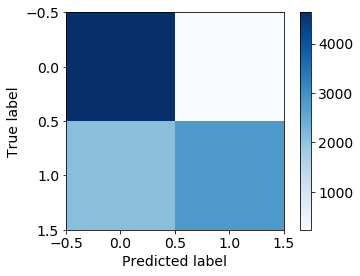

In [213]:
#Confusion Matrix
#The result is telling us that we have 4330 (TP) + 2822 (TN) correct predictions 
#and 2097 (FP) + 534 (FN) incorrect predictions.

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap=plt.cm.Blues, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)
ax.set(ylabel='True label', xlabel='Predicted label')

In [214]:
#Compute precision, recall, F-measure and support

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80      4864
           1       0.92      0.57      0.71      4919

    accuracy                           0.76      9783
   macro avg       0.81      0.76      0.75      9783
weighted avg       0.81      0.76      0.75      9783



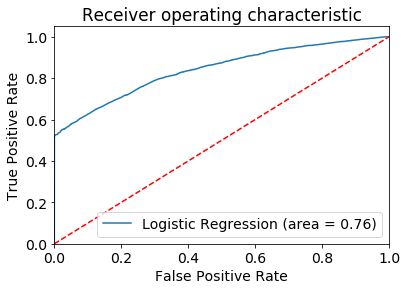

In [215]:
#ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [216]:
#Adding demographic columns to see if the prediction can be improved

#Create dummy variables for more demographic fields

cat_vars = ['EDUCATION','MARRIAGE']
for var in cat_vars:
    cat_list ='var'+'_'+var
    cat_list = pd.get_dummies(df0[var], prefix=var)
    df0_temp = df0.join(cat_list)
    df0 = df0_temp

df0.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month', 'CATEGORY',
       'PAY_AMT_CAT1', 'BILL_AMT_CAT1', 'PAY_AMT_CAT2', 'BILL_AMT_CAT2',
       'PAY_AMT_CAT3', 'BILL_AMT_CAT3', 'PAY_AMT_CAT4', 'BILL_AMT_CAT4',
       'PAY_AMT_CAT5', 'BILL_AMT_CAT5', 'PAY_AMT_CAT6', 'BILL_AMT_CAT6',
       'DEBT_OWED1', 'DEBT_OWED_CAT1', 'DEBT_OWED2', 'DEBT_OWED_CAT2',
       'DEBT_OWED3', 'DEBT_OWED_CAT3', 'DEBT_OWED4', 'DEBT_OWED_CAT4',
       'DEBT_OWED5', 'DEBT_OWED_CAT5', 'DEBT_OWED6', 'DEBT_OWED_CAT6',
       'PCT_CREDIT_UTILIZED1', 'PCT_CREDIT_UTILIZED_CAT1',
       'PCT_CREDIT_UTILIZED2', 'PCT_CREDIT_UTILIZED_CAT2',
       'PCT_CREDIT_UTILIZED3', 'PCT_CREDIT_UTILIZED_CAT3',
       'PCT_CREDIT_UTILIZED4', 'PCT_CREDIT_UTILIZED_

In [217]:
cols=['PAY_1', 'PAY_2', 'PAY_3', 'SEX_female','SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school', \
      'EDUCATION_others', 'EDUCATION_university', 'EDUCATION_unknown', 'MARRIAGE_married', 'MARRIAGE_single', \
      'CATEGORY_21-30','CATEGORY_31-40', 'CATEGORY_41-50','CATEGORY_51-60','CATEGORY_61-70',\
      'CATEGORY_71-80','PAY_AMT_CAT6_0','PAY_AMT_CAT6_100-999','PAY_AMT_CAT6_1000-9999','PAY_AMT_CAT6_10000-99999',\
      'PAY_AMT_CAT6_100000-1000000','PAY_AMT_CAT6_< 100','BILL_AMT_CAT6_0','BILL_AMT_CAT6_< 0',\
      'PCT_CREDIT_UTILIZED_CAT1_10-20%','PCT_CREDIT_UTILIZED_CAT1_< 0','PCT_CREDIT_UTILIZED_CAT1_> 100%',\
      'PCT_CREDIT_UTILIZED_CAT1_> 50%','PCT_CREDIT_UTILIZED_CAT6_10-20%','PCT_CREDIT_UTILIZED_CAT6_20-30%',\
      'PCT_CREDIT_UTILIZED_CAT6_30-40%','PCT_CREDIT_UTILIZED_CAT6_40-50%','PCT_CREDIT_UTILIZED_CAT6_< 10%',\
      'PCT_CREDIT_UTILIZED_CAT6_> 100%','PCT_CREDIT_UTILIZED_CAT6_> 50%']

X=df0[cols]
y=df0['default payment next month'].astype(int)

In [218]:
#Over-sampling using SMOTE

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['default payment next month'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-default in oversampled data",len(os_data_y[os_data_y['default payment next month']==0]))
print("Number of default",len(os_data_y[os_data_y['default payment next month']==1]))
print("Proportion of non-default data in oversampled data is ",len(os_data_y[os_data_y['default payment next month']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['default payment next month']==1])/len(os_data_X))

length of oversampled data is  32608
Number of non-default in oversampled data 16304
Number of default 16304
Proportion of non-default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


In [219]:
#Run LR model

logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.566552
         Iterations 7
                                 Results: Logit
Model:                 Logit                       Pseudo R-squared:  0.183     
Dependent Variable:    default payment next month  AIC:               37022.2593
Date:                  2020-06-09 13:33            BIC:               37332.7749
No. Observations:      32608                       Log-Likelihood:    -18474.   
Df Model:              36                          LL-Null:           -22602.   
Df Residuals:          32571                       LLR p-value:       0.0000    
Converged:             1.0000                      Scale:             1.0000    
No. Iterations:        7.0000                                                   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------

In [220]:
#Remove variable with p > 0.05

del os_data_X['CATEGORY_71-80']

In [221]:
#Logistic Regression Model Fitting, adjust C for hyperparameter tuning (regularization, default 1.0 to 0.2)

from sklearn import metrics

os_data_y = np.ravel(os_data_y)

#X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)

#CV_logreg = GridSearchCV(logreg, param_grid = {"C": np.logspace(-4, 4, 10)}, scoring = "f1_macro")
#CV_logreg.fit(X_train, y_train)
#print(CV_logreg.best_params_) #{'C': 21.54434690031882}

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000, C=21.54434690031882)
logreg.fit(X_train, y_train)

LogisticRegression(C=21.54434690031882, max_iter=1000)

In [222]:
#Predicting the test set results and calculating the accuracy
#Accuracy of logistic regression classifier on test set: 0.79 (no change with different C)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


[[4223  641]
 [1455 3464]]


[Text(0, 0.5, 'True label'), Text(0.5, 0, 'Predicted label')]

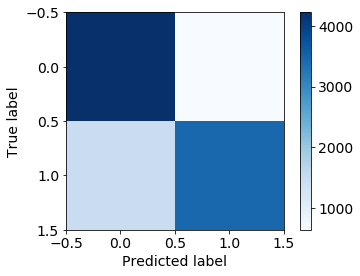

In [223]:
#Confusion Matrix: larger C
#The result is telling us that we have 4163->4223 (TP) + 3522->3464 (TN) correct predictions 
#and 1397->1455 (FP) + 701->641 (FN) incorrect predictions.

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap=plt.cm.Blues, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)
ax.set(ylabel='True label', xlabel='Predicted label')

In [224]:
#Compute precision, recall, F-measure and support

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80      4864
           1       0.84      0.70      0.77      4919

    accuracy                           0.79      9783
   macro avg       0.79      0.79      0.78      9783
weighted avg       0.79      0.79      0.78      9783



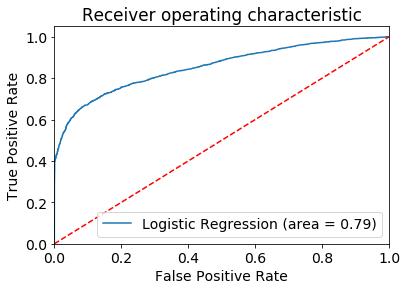

In [225]:
#ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [226]:
X_test_pred0 = X_test

X_test_pred0.loc[:, 'pred'] = logreg.predict(X_test)
X_test_pred0.loc[:, 'y'] = y_test

C:\Users\v-wumei\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\v-wumei\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [227]:
X_test_pred0.loc[:,'status'] = 'FN'

X_test_pred0['status'] = np.where((X_test_pred0['y'] == 0) & (X_test_pred0['pred'] == 1), 'FP', X_test_pred0['status'])
X_test_pred0['status'] = np.where((X_test_pred0['y'] == 0) & (X_test_pred0['pred'] == 0), 'TN', X_test_pred0['status'])
X_test_pred0['status'] = np.where((X_test_pred0['y'] == 1) & (X_test_pred0['pred'] == 1), 'TP', X_test_pred0['status'])

C:\Users\v-wumei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\v-wumei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\v-wumei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning

In [228]:
#save test data along with prediction to csv

X_test_pred0.to_csv('TW_CC_RegPred.csv', index = False, header=True)

In [386]:
#draw series of histograms based on features and classifications

plt.rcParams.update({'font.size': 10})
from matplotlib.patches import Rectangle
def draw_hist(df):
    plt.clf()
    
    not_indicator = ['pred', 'y', 'status']
    
    features= [c for c in df.columns if c not in not_indicator]
    
    fig, ax = plt.subplots(6,2, figsize =(15, 15), dpi = 100)
    i =  0
    for row in ax: 
        for col in row: 
            feature_col = features[i]
            if len(df[feature_col].unique())> 2:
                statuses = list(df['status'].unique())
                
                for s in statuses:
                    (col.hist(df[df['status']== s][feature_col],
                              alpha = 0.5, 
                              label = s))
                    col.set_title('{} histogram'.format(feature_col))
                col.legend()
            else:
                for s in statuses:
                    s_df = df[df['status'] == s]
                    counts = s_df[feature_col].value_counts().reset_index()

                    counts.columns = ['indicator', feature_col]
                    
                    (col.bar(x = counts['indicator'],
                             height = counts[feature_col],alpha = 0.5,
                             label = s))
                    
                col.set_title('{} bar chart'.format(feature_col))
                col.legend()

            plt.subplots_adjust(hspace = 0.5)

            i +=1 
    return fig

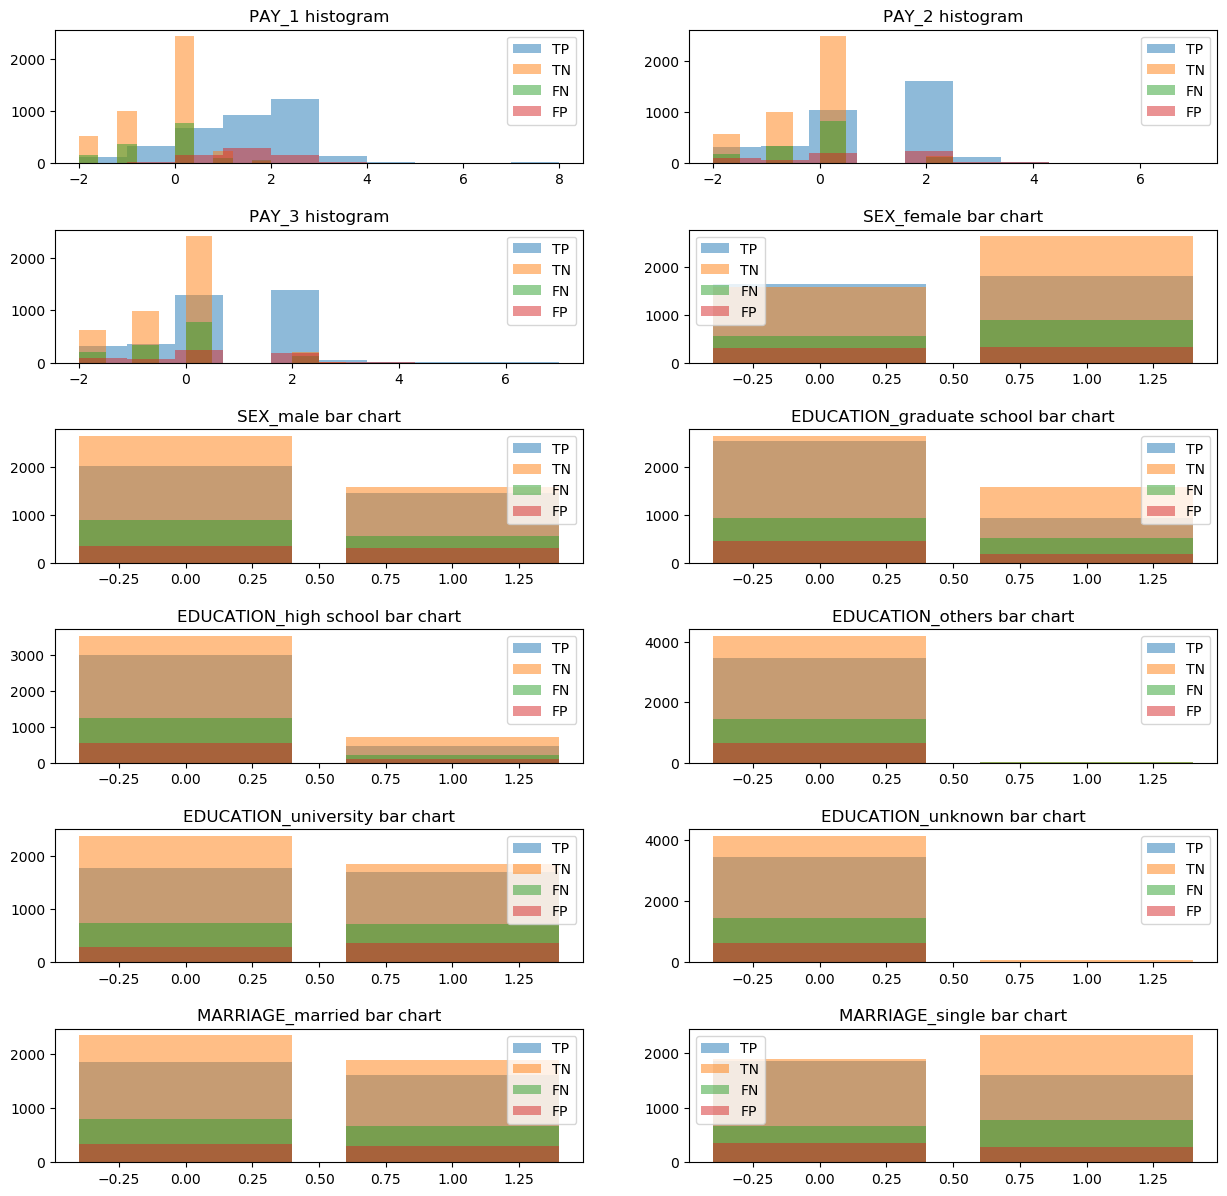

<Figure size 432x288 with 0 Axes>

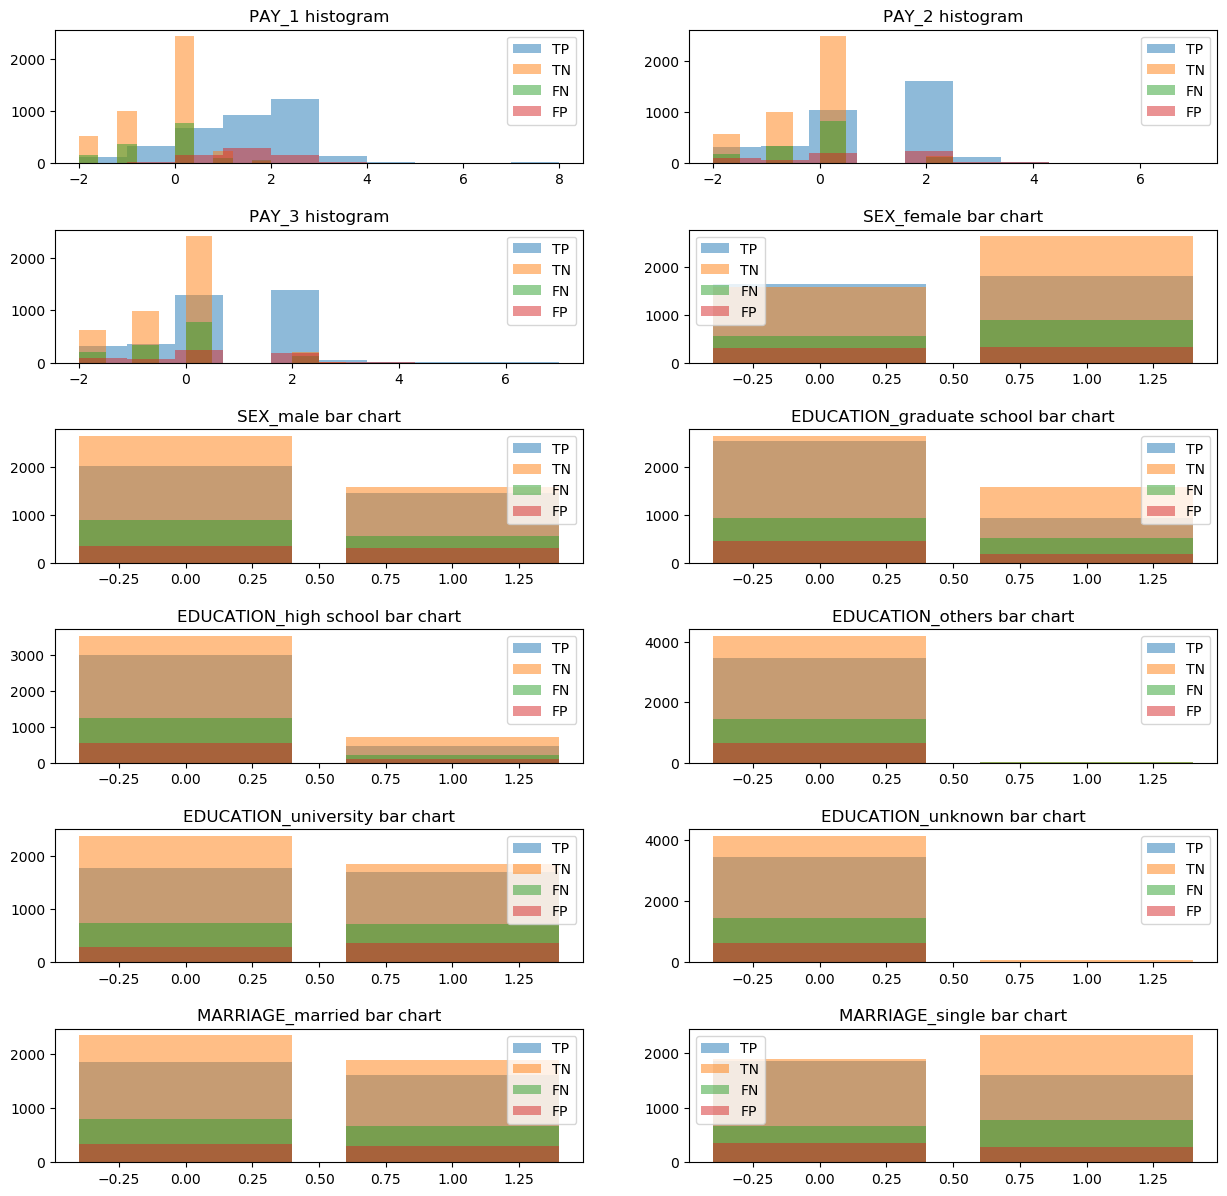

In [387]:
draw_hist(X_test_pred0)